# 3) Pre-Processing
## Checklist (non-exhaustive)
-   Creation train/test set
-   Elimination of NaN : dropna(), imputation, empty col
-   Encoding of categorical variables
-   Delete outliers with negative impact on the model
-   Feature Selection
-   Feature Engineering (PCA after creating a lot of variables)
-   Feature Scaling

## Objectifs
1. Formating Data 
- Train/Test/Validation set
- Encoding
- Remove NaN

2. Improve model performance
- Feature Selection
- Feature Engineering
- Feature Scaling 
- Delete Outliers

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
pd.set_option('display.max_column', 150)

In [2]:
train_data = pd.read_csv('/Users/theob/Desktop/DSBA ESSEC CENTRAL/Cours/Courses/Foundation of Machine Learning (FLM)/Homework/Ass2/Git-Code/Credit-Score-Classification/data/train_set.csv', index_col=0)
train_data.name = 'train_data'
test_data = pd.read_csv('/Users/theob/Desktop/DSBA ESSEC CENTRAL/Cours/Courses/Foundation of Machine Learning (FLM)/Homework/Ass2/Git-Code/Credit-Score-Classification/data/test_set.csv', index_col=0)
test_data.name = 'test_data'

In [3]:
trainset, testset = train_test_split(train_data, test_size=0.2, random_state=0)

In [4]:
testset

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
90512,50143,3,Kate Holtonj,22.0,468781035.0,Accountant,10142.545,991.212083,8.0,8.0,31.0,9.0,"debt consolidation loan,auto loan,payday loan,...",59.0,21.0,17.00,8.0,Bad,4969.70,32.906085,22.0,Yes,54.569281,32.094265,Low_spent_Small_value_payments,211.708131,Poor
150743,17343,6,Henryj,44.0,233994568.0,Lawyer,42671.510,3731.959167,1.0,1.0,10.0,4.0,"personal loan,debt consolidation loan,not spec...",2.0,10.0,4.28,5.0,Good,132.87,26.507182,228.0,No,87.777403,53.620410,High_spent_Large_value_payments,429.015356,Good
130725,38892,4,Oreskovicc,39.0,920992901.0,Engineer,17212.350,1271.362500,8.0,9.0,26.0,2.0,"home equity loan,not specified",61.0,20.0,13.44,12.0,Bad,2427.44,34.945547,139.0,Yes,15.953524,31.709279,Low_spent_Small_value_payments,312.943766,Poor
131255,6678,6,Leahb,34.0,316834105.0,Accountant,56391.120,4791.260000,9.0,9.0,17.0,6.0,"credit-builder loan,credit-builder loan,person...",26.0,25.0,25.95,13.0,Bad,3881.11,37.201612,104.0,Yes,243.270871,67.943550,Low_spent_Small_value_payments,346.929867,Poor
63199,19727,2,Malonem,29.0,542519266.0,Entrepreneur,14602.160,1222.846667,10.0,8.0,33.0,7.0,"payday loan,debt consolidation loan,not specif...",46.0,21.0,22.02,8.0,Bad,4205.70,30.572251,38.0,NM,80.651119,19.307230,Low_spent_Small_value_payments,182.910807,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154210,50739,5,rab,23.0,872646789.0,Lawyer,26686.140,2284.845000,4.0,6.0,19.0,6.0,"home equity loan,not specified,home equity loa...",10.0,8.0,13.81,4.0,Standard,220.17,23.584577,103.0,Yes,81.392583,37.879731,Low_spent_Large_value_payments,215.385347,Standard
114273,15702,4,Angelaw,39.0,313510955.0,Media_Manager,14977.930,1293.160833,9.0,7.0,31.0,8.0,"debt consolidation loan,payday loan,mortgage l...",37.0,16.0,18.63,9.0,Bad,4857.54,38.349455,155.0,Yes,72.663474,30.792169,Low_spent_Medium_value_payments,271.086631,Standard
80192,42352,3,David Stanwaym,34.0,772625695.0,Writer,9999.420,888.285000,8.0,6.0,14.0,3.0,"payday loan,not specified,credit-builder loan",9.0,12.0,1.56,2.0,Standard,153.12,33.518282,334.0,No,21.635164,43.761524,Low_spent_Small_value_payments,303.431812,Standard


In [5]:
def one_hot_encoding_col(df, col):
    df = pd.get_dummies(df, columns=col)
    df = df.replace({False: 0, True: 1})
    return df

In [6]:
def one_hot_encoding_loan_type(df):

    loan_types = df['Type_of_Loan'].str.split(',', expand=True)
    encoded_loans = pd.get_dummies(loan_types, prefix='', prefix_sep='').groupby(level=0, axis=1).max()
    df = pd.concat([df, encoded_loans], axis=1)
    df = df.replace({False: 0, True: 1})
    return df


In [7]:
def preprocessing(df, data_type):
    df = one_hot_encoding_col(df, ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'])
    df = one_hot_encoding_loan_type(df)
    df = df.drop(['Customer_ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1)
    

    if data_type == 'train':
        X = df.drop(['Credit_Score'], axis=1)
        y = df['Credit_Score']
   
   
        categories = [['Poor', 'Standard', 'Good']]
        encoder = OrdinalEncoder(categories=categories)
        y = encoder.fit_transform(y.values.reshape(-1, 1))
        y = y.ravel()
        return X, y
    else:
        X = df
        return X
   


In [8]:
X_train, y_train = preprocessing(trainset, 'train')
X_test, y_test = preprocessing(testset , 'train')
# 0 = Poor
# 1 = Standard
# 2 = Good

In [9]:
X_test

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,No Data,auto loan,credit-builder loan,debt consolidation loan,home equity loan,mortgage loan,not specified,payday loan,personal loan,student loan
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90512,3,22.0,10142.545,991.212083,8.0,8.0,31.0,9.0,59.0,21.0,17.00,8.0,4969.70,32.906085,22.0,54.569281,32.094265,211.708131,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0
150743,6,44.0,42671.510,3731.959167,1.0,1.0,10.0,4.0,2.0,10.0,4.28,5.0,132.87,26.507182,228.0,87.777403,53.620410,429.015356,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
130725,4,39.0,17212.350,1271.362500,8.0,9.0,26.0,2.0,61.0,20.0,13.44,12.0,2427.44,34.945547,139.0,15.953524,31.709279,312.943766,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
131255,6,34.0,56391.120,4791.260000,9.0,9.0,17.0,6.0,26.0,25.0,25.95,13.0,3881.11,37.201612,104.0,243.270871,67.943550,346.929867,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
63199,2,29.0,14602.160,1222.846667,10.0,8.0,33.0,7.0,46.0,21.0,22.02,8.0,4205.70,30.572251,38.0,80.651119,19.307230,182.910807,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154210,5,23.0,26686.140,2284.845000,4.0,6.0,19.0,6.0,10.0,8.0,13.81,4.0,220.17,23.584577,103.0,81.392583,37.879731,215.385347,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
114273,4,39.0,14977.930,1293.160833,9.0,7.0,31.0,8.0,37.0,16.0,18.63,9.0,4857.54,38.349455,155.0,72.663474,30.792169,271.086631,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0
80192,3,34.0,9999.420,888.285000,8.0,6.0,14.0,3.0,9.0,12.0,1.56,2.0,153.12,33.518282,334.0,21.635164,43.761524,303.431812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0


# Model Selection


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [11]:
# Baseline model -> OVERFITTING
model_test1 = DecisionTreeClassifier(random_state=0) 

# Better but OVERFITTING
model_test2 = RandomForestClassifier(random_state=0)

# Here we select thanks to an ANOVA Test only the best k features in term of importance in our model -> GOOD
model_test3 = make_pipeline(SelectKBest(f_classif, k=9), 
                      RandomForestClassifier(random_state=0))

# Use Polynomial Feature to combine feature and but square them -> GOOD MODEL
model_test4 = make_pipeline(PolynomialFeatures(2),
                            SelectKBest(f_classif,k=10),
                            RandomForestClassifier(random_state=0))

# Use PCA as a feature selection algorithm -> BUT TOO MUCH OVERFITTING
model_test5 = make_pipeline(PolynomialFeatures(2),
                            PCA(n_components=5),
                            RandomForestClassifier(random_state=0))

model_test6 = model_test5 = make_pipeline( SelectKBest(f_classif,k=10),
                            RandomForestClassifier(random_state=0))

# Evaluation


In [12]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve #Now if the model is under or over fitting

In [13]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1_weighted',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def plot_class_histograms(model,X_train,y_train, X_test, y_true, class_labels):
    """
    Plots histograms for each class showing the distribution of predicted probabilities.
    """
    model.fit(X_train, y_train)

    # Prédire les probabilités pour chaque classe
    y_pred_probs = model.predict_proba(X_test)

    num_classes = len(class_labels)
    fig, axes = plt.subplots(1, num_classes, figsize=(num_classes * 5, 5))

    for i in range(num_classes):
        axes[i].hist(y_pred_probs[:, i], bins=10, alpha=0.7)
        axes[i].set_title(f'Predicted Probabilities for Class {class_labels[i]}')
        axes[i].set_xlabel('Probability')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def plot_roc_curves(model,X_train,y_train, X_test, y_test, class_labels):
    """
    Plots ROC curves for each class (One-vs-Rest).
    """
    model.fit(X_train, y_train)

    # Prédire les probabilités pour chaque classe
    y_pred_probs = model.predict_proba(X_test)

    num_classes = len(class_labels)
    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(num_classes):
        # Create a binary array for current class
        y_true_binary = (y_test == i).astype(int)
        
        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_true_binary, y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)

        ax.plot(fpr, tpr, lw=2, label=f'Class {class_labels[i]} (area = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curves for Each Class')
    ax.legend(loc="lower right")

    plt.show()

# Example usage (assuming y_test is your true labels and y_pred_probs is your predicted probabilities):
class_labels = [0, 1, 2]  # Adjust based on your classes
# plot_class_histograms(y_test, y_pred_probs, class_labels)
# plot_roc_curves(y_test, y_pred_probs, class_labels)


In [15]:

#plot_roc_curves(model_test4,X_train,y_train, X_test, y_test, class_labels)
#plot_class_histograms(model_test4,X_train,y_train, X_test, y_test, class_labels)

In [16]:
# Remove low importance feature to avoid overfitting
# Conclusion : This idea doesn't cope the overfitting problem
#def improved_processing(X,y, col_list):
 #   X = X[col_list]
 #   return X, y
#X_train, y_train = improved_processing(X_train,y_train,col_list)
#X_test, y_test = improved_processing(X_test,y_test,col_list)

# Modeling

In [17]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [18]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=7))

In [19]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
Linear = make_pipeline(preprocessing, StandardScaler(),LogisticRegression())
DecisionTree = make_pipeline(DecisionTreeClassifier())
XGBoost = XGBClassifier(objective='multi:softmax')


In [20]:
list_of_model = [RandomForest, AdaBoost, KNN, DecisionTree, XGBoost]

In [21]:
def test_accuracy(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    ypred2 = model.predict(X_train)
    print(f'TEST {accuracy_score(ypred, y_test)}')
    print(f'TRAIN {accuracy_score(ypred2, y_train)}')
    print(classification_report(y_test, ypred))

# Optimisation

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display="text") # or text or diagram


In [23]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}



In [24]:
grid = GridSearchCV(XGBoost, parameters, scoring='roc_auc_ovr', n_jobs = 10,
    cv = 10,
    verbose=True)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}


In [25]:
final_model = grid.best_estimator_

In [26]:
test_accuracy(final_model)

TEST 0.7992857142857143
TRAIN 0.9383571428571429
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      4156
         1.0       0.82      0.82      0.82      7347
         2.0       0.76      0.78      0.77      2497

    accuracy                           0.80     14000
   macro avg       0.79      0.79      0.79     14000
weighted avg       0.80      0.80      0.80     14000



[[3261  809   86]
 [ 822 5989  536]
 [  14  543 1940]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      4156
         1.0       0.82      0.82      0.82      7347
         2.0       0.76      0.78      0.77      2497

    accuracy                           0.80     14000
   macro avg       0.79      0.79      0.79     14000
weighted avg       0.80      0.80      0.80     14000



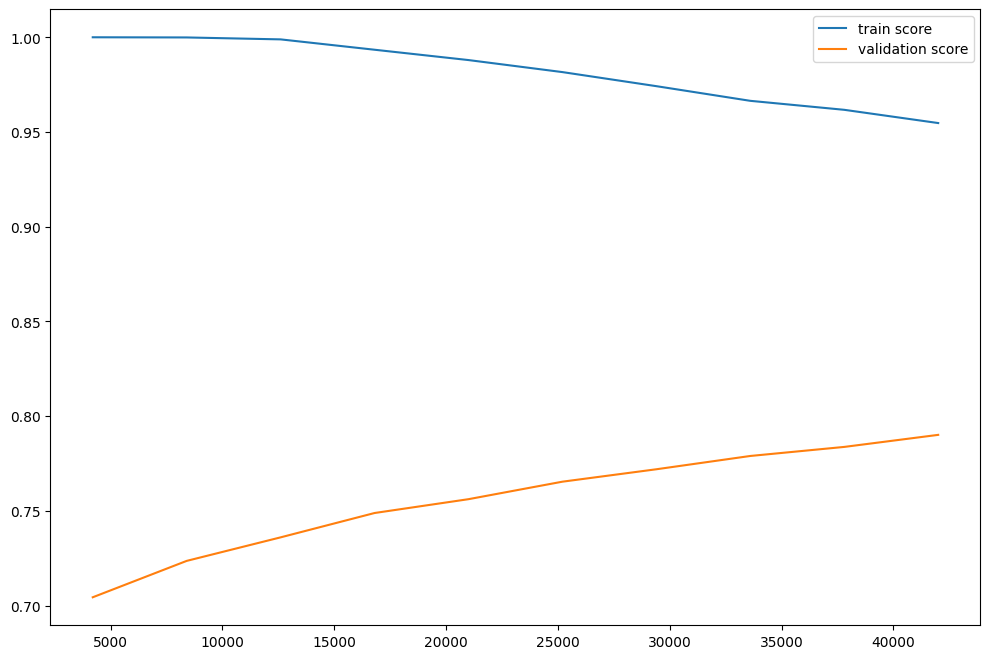

In [27]:
evaluation(final_model)

In [ ]:
best_hyper_params= {'randomforestclassifier__max_depth': 60, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 2000}
best_param_xgb = {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}

#72min entrainement ...

# Submission

In [25]:
X_train,y_train = preprocessing(train_data, 'train')
final_model.fit(X_train, y_train)
X_test = preprocessing(test_data, 'test')
list_of_predictions = final_model.predict(X_test)
list_of_predictions

array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

In [26]:
def replace_array_elements(original_array):
    replacement_map = {
        0: 'Poor',
        1: 'Standard',
        2: 'Good'
    }

    modified_array = np.array([replacement_map[value] for value in original_array])
    return modified_array

# Exemple d'utilisation
list_of_predictions = replace_array_elements(list_of_predictions)
print(list_of_predictions)


['Standard' 'Good' 'Poor' ... 'Standard' 'Poor' 'Poor']


In [27]:
df = pd.DataFrame({'Credit_Score': list_of_predictions}, index=X_test.index)
df

,Credit_Score
ID,
68757,Standard
113371,Good
154933,Poor
77449,Poor
60732,Poor
...,...
129058,Standard
108661,Standard
120097,Standard


In [28]:
df.to_csv('/Users/theob/Desktop/DSBA ESSEC CENTRAL/Cours/Courses/Foundation of Machine Learning (FLM)/Homework/Ass2/Git-Code/Credit-Score-Classification/data/sandbox_submission_2.csv')